# Data pre-processing

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

In [113]:
iris =  pd.read_csv("/home/yatin/Downloads/IRIS.csv")
iris = iris.sample(frac=1).reset_index(drop=True) # Shuffle

In [114]:
iris.shape

(150, 5)

In [115]:
X = iris[["sepal_length","sepal_width","petal_length","petal_width"]]
X = np.array(X)
X.shape

(150, 4)

In [116]:
Y = iris.species
# print(Y)
Y = one_hot_encoder.fit_transform(np.array(Y).reshape(-1, 1))
Y[0:5]
print(Y.shape)

(150, 3)


In [117]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
X_train=X_train.T
Y_train=Y_train.T
X_test=X_test.T
Y_test=Y_test.T
print("X_train.shape",X_train.shape,"\nY_train.shape",Y_train.shape,"\nX_test",X_test.shape,"\nY_test",Y_test.shape)

X_train.shape (4, 120) 
Y_train.shape (3, 120) 
X_test (4, 30) 
Y_test (3, 30)


In [118]:
features = iris.columns[1:-1]

In [119]:
for c in features: 
#     iris['{}'.format(c)]= (iris['{}'.format(c)] - iris['{}'.format(c)].mean())/ iris['{}'.format(c)].std()                             # Standardization 
    iris['{}'.format(c)]= (iris['{}'.format(c)] - min(iris['{}'.format(c)]))/ (max(iris['{}'.format(c)])-min(iris['{}'.format(c)]))      # Normalizing
iris.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species
0,7.7,0.250000,1.000000,0.916667,Iris-virginica
1,4.8,0.583333,0.101695,0.041667,Iris-setosa
2,5.5,0.208333,0.508475,0.500000,Iris-versicolor
3,4.8,0.416667,0.067797,0.083333,Iris-setosa


# Functions 

In [120]:
def initialize_parameters(layers_dims, print_shapes = False):
    
    L = len(layers_dims)
    parameters ={}
    
    for i in range(1,L) :
        parameters['W'+ str(i)] = np.random.rand(layers_dims[i],layers_dims[i-1])*0.01
        parameters['b'+ str(i)] = np.zeros((layers_dims[i],1))
        
    if print_shapes :
        initialize_parameters_print_shapes(parameters)
#     if print_all:
#         initialize_parameters_print_all(parameters)

    return parameters        

In [121]:
layers_dims = [4,7,9,2]
parameters = initialize_parameters(layers_dims)

In [122]:
parameters

{'W1': array([[0.00474319, 0.00822516, 0.00320499, 0.00318217],
        [0.00640439, 0.0087402 , 0.00636211, 0.00988219],
        [0.00391531, 0.00914901, 0.00166451, 0.00737328],
        [0.00776228, 0.00158588, 0.00510571, 0.00938935],
        [0.00838001, 0.00442371, 0.00564305, 0.00934555],
        [0.00732551, 0.00331648, 0.00364632, 0.00271923],
        [0.00773077, 0.00215292, 0.00241209, 0.0041857 ]]), 'b1': array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]), 'W2': array([[4.97050498e-03, 5.43226136e-03, 6.31412893e-03, 5.46926669e-04,
         7.74010758e-03, 3.45343870e-03, 7.08175463e-03],
        [8.35950117e-03, 2.10645596e-04, 7.43911519e-03, 2.84174681e-05,
         3.62924982e-03, 8.62292941e-03, 1.34433641e-03],
        [3.28691466e-03, 1.40806396e-03, 2.97943184e-03, 2.56353493e-03,
         4.83074995e-03, 2.02528499e-03, 9.41536062e-03],
        [4.25787887e-03, 8.91081163e-03, 9.32866289e-03, 9.32037866e-03,
         4

In [123]:
def initialize_parameters_print_shapes(parameters):
    print('initialised:\n')
    for i in range(1,L):
        print('\nW'+ str(i),parameters['W'+ str(i)].shape)
        print('\nb'+ str(i),parameters['b'+ str(i)].shape)
    print('--------------------------------------------')

# def initialize_parameters_print_all(parameters):
#     print('initialised:\n')
#     for i in range(1,L):
# #         print(parameters['W1'])
#         print('W'+ str(i),parameters['W'+ str(i)])
#         print('b'+ str(i),parameters['b'+ str(i)])
#     print('--------------------------------------------')

$\Large S(y_i) = \frac {e^{y_i}}{\sum_{j=1}^{i} y_j}$

In [124]:
# def relu(Z):
#     A = np.maximum(Z,0,Z)
#     return A

def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
#     print(e_x)
    return e_x / e_x.sum()

# def softmax(x):
#     return np.exp(x) / np.sum(np.exp(x), axis=0)

# scores = [3.0, 1.60, 0.0]
# print(softmax(scores))
# print(softmax2(scores))

In [125]:
def forward_propogation(X,parameters,layers_dims,print_para = False):
    
    L = len(layers_dims)
    A_prev = X
    
    for i in range(1,L-1): # 1st hidden layer to last hidden layer
        parameters ['Z'+ str(i)] = np.dot(parameters ['W'+ str(i)],A_prev) + parameters ['b'+ str(i)]
        parameters ['A'+ str(i)] = sigmoid(parameters ['Z'+ str(i)])
        A_prev = parameters ['A'+ str(i)]
    # for the output layer we will use softmax
    parameters ['Z'+ str(i+1)] = np.dot(parameters ['W'+ str(i+1)],A_prev) + parameters ['b'+ str(i+1)]
#     print(parameters['Z'+ str(i+1)])
    parameters ['AL'] = softmax(parameters ['Z'+ str(i+1)])
#     parameters ['AL'] = parameters.pop('A4') 
    
    if print_para:
        forward_propogation_print_shapes()
            
    return parameters ['AL'] ,parameters

In [126]:
AL,parameters = forward_propogation(X_train,parameters,layers_dims)

In [127]:
# parameters['Z1']

In [128]:
a = np.arange(10)
print(a)
np.tanh(a)

[0 1 2 3 4 5 6 7 8 9]


array([0.        , 0.76159416, 0.96402758, 0.99505475, 0.9993293 ,
       0.9999092 , 0.99998771, 0.99999834, 0.99999977, 0.99999997])

In [129]:
# parameters['A1']

In [130]:
AL

array([[0.00419004, 0.00419006, 0.00419005, 0.00419005, 0.00419005,
        0.00419003, 0.00419006, 0.00419004, 0.00419004, 0.00419004,
        0.00419004, 0.00419005, 0.00419004, 0.00419005, 0.00419005,
        0.00419004, 0.00419005, 0.00419005, 0.00419005, 0.00419004,
        0.00419005, 0.00419003, 0.00419005, 0.00419004, 0.00419005,
        0.00419003, 0.00419004, 0.00419004, 0.00419006, 0.00419004,
        0.00419004, 0.00419004, 0.00419004, 0.00419006, 0.00419005,
        0.00419004, 0.00419005, 0.00419005, 0.00419004, 0.00419005,
        0.00419004, 0.00419004, 0.00419005, 0.00419005, 0.00419006,
        0.00419004, 0.00419006, 0.00419005, 0.00419005, 0.00419004,
        0.00419003, 0.00419006, 0.00419005, 0.00419005, 0.00419004,
        0.00419005, 0.00419005, 0.00419004, 0.00419004, 0.00419005,
        0.00419004, 0.00419004, 0.00419006, 0.00419005, 0.00419005,
        0.00419004, 0.00419004, 0.00419005, 0.00419006, 0.00419004,
        0.00419004, 0.00419006, 0.00419004, 0.00

In [131]:
def forward_propogation_print_shapes():
    print('F_propogated:\n')
    for i in range(1,L):
        print('\n','Z'+str(i),parameters['Z'+str(i)].shape)
        print('\n','W'+str(i),parameters['W'+str(i)].shape)
        print('\n','b'+str(i),parameters['b'+str(i)].shape)
    print('\n','AL',parameters['AL'].shape)
    print('--------------------------------------------')

In [132]:
layers_dims = [3,5,4,2,1]
L = len(layers_dims)
parameters = initialize_parameters(layers_dims, print_shapes = False )
X = np.random.rand(3,40)
AL,parameters = forward_propogation(X,parameters,layers_dims,L)
# print(parameters)

F_propogated:


 Z1 (5, 40)

 W1 (5, 3)

 b1 (5, 1)

 Z2 (4, 40)

 W2 (4, 5)

 b2 (4, 1)

 Z3 (2, 40)

 W3 (2, 4)

 b3 (2, 1)

 Z4 (1, 40)

 W4 (1, 2)

 b4 (1, 1)

 AL (1, 40)
--------------------------------------------


$\large Cost = -\frac{1}{m}\sum_{i=1}^m(y\times log(h(x))+(1-y)\times log(1-h(x)))$

In [133]:
def compute_cost(Y,AL):
    e=1e-5
    m = Y.shape[1]
    cost = (-1/m)*np.sum(np.multiply(Y,np.log(AL+e),np.multiply(1-Y,np.log(1-AL+e))))
    return(cost)

In [134]:
# Y = np.random.rand(2,2)
# AL = np.random.rand(2,2)
# cost=compute_cost(Y,AL)
# print(cost)

$\delta Z = (\frac{-Y}{AL} - \frac{1-Y}{1-AL})\times\sigma\prime(Z)  =  \delta A\times\sigma\prime(Z) $

In [135]:
def softmax_backwards(cache):
    return softmax(cache)*(1-softmax(cache))

def sigmoid_backwards(cache):
    return sigmoid(cache)*(1-sigmoid(cache))

def tanh_backwards(Z):
    return 1 - np.tanh(Z)**2


$\large\delta A^{[l]} = (\frac{-Y}{AL} - \frac{1-Y}{1-AL})$

$\large\delta Z^{[l]} =  \delta A\times\sigma\prime(Z) $

$\large\delta W^{[l]} =  \frac {1}{m}\delta Z^{[l]} . A^{[l-1]T}$

$\large\delta b^{[l]} = \frac {1}{m}\sum _{i=1}^{m}\delta Z$

$\large\delta A^{[l-1]} = W^{[l]T} . dZ^{[l]}$

In [136]:
for l in reversed(range(1,4)):
    print(l)

3
2
1


In [137]:
def backpropogation(layers_dims,parameters,AL,Y,X,print_shapes = False):
    caches = {}
    m = Y.shape[1]
    L = len(layers_dims)
    flag = True
    parameters['A' + str(0)] = X
    for l in reversed(range(1,L)): # last activation to first
        
        if (flag) :   
            caches['dAL'] = np.divide(-Y,AL)-np.divide(1-Y,1-AL)                               
            caches['dZ'+ str(l)] = np.multiply(caches['dAL'],softmax_backwards(parameters['Z'+ str(l)]) )   
            caches['dW'+ str(l)] = (1/m)*np.dot(caches['dZ'+ str(l)],parameters['A' + str(l-1)].T)          
            caches['db'+ str(l)] = (1/m)*np.sum(caches['dZ'+ str(l)],axis=1,keepdims=True)     
            caches['dA' + str(l-1)] = np.dot(parameters['W'+ str(l)].T,caches['dZ' + str(l)])
            flag = False
        else:
            caches['dZ'+ str(l)] = np.multiply(caches['dA' + str(l)],sigmoid_backwards(parameters['Z'+ str(l)]))
            caches['dW'+ str(l)] = (1/m)*np.dot(caches['dZ'+ str(l)],parameters['A' + str(l-1)].T)
            caches['db'+ str(l)] = (1/m)*np.sum(caches['dZ'+ str(l)],axis=1,keepdims=True)
            if (l-1 != 0) :
                caches['dA' + str(l-1)] = np.dot(parameters['W' + str(l)].T,caches['dZ' + str(l)]) 
                
    if print_shapes :
        backpropogation_print_shapes(caches)
    
    return caches

In [138]:
def backpropogation_print_shapes(caches):
    print('B_propogated:\n')
    print ('dAL',caches['dAL'].shape)
    for l in range(1,L):
        print("dZ"+ str(l),caches['dZ'+ str(l)].shape)
        print("dW"+ str(l),caches['dW'+ str(l)].shape)
        print("db"+ str(l),caches['db'+ str(l)].shape)
        if (l-1 != 0) :
            print('dA' + str(l-1),caches['dA' + str(l-1)].shape)
    print('--------------------------------------------')

In [139]:
layers_dims = [3,5,4,2,1]
L = len(layers_dims)

In [140]:
layers_dims = [4,5,4,2,3]
L = len(layers_dims)
parameters = initialize_parameters(layers_dims,print_shapes=True)
X = np.random.rand(4,140)
Y = np.random.rand(1,140)
AL,cache = forward_propogation(X,parameters,layers_dims,print_para = True)
# forward_propogation_print_shapes()
caches = backpropogation(layers_dims,cache,AL,Y,X,print_shapes=True)
print(caches)

initialised:


W1 (5, 4)

b1 (5, 1)

W2 (4, 5)

b2 (4, 1)

W3 (2, 4)

b3 (2, 1)

W4 (3, 2)

b4 (3, 1)
--------------------------------------------
F_propogated:


 Z1 (5, 140)

 W1 (5, 4)

 b1 (5, 1)

 Z2 (4, 140)

 W2 (4, 5)

 b2 (4, 1)

 Z3 (2, 140)

 W3 (2, 4)

 b3 (2, 1)

 Z4 (3, 140)

 W4 (3, 2)

 b4 (3, 1)

 AL (3, 140)
--------------------------------------------
B_propogated:

dAL (3, 140)
dZ1 (5, 140)
dW1 (5, 4)
db1 (5, 1)
dZ2 (4, 140)
dW2 (4, 5)
db2 (4, 1)
dA1 (5, 140)
dZ3 (2, 140)
dW3 (2, 4)
db3 (2, 1)
dA2 (4, 140)
dZ4 (3, 140)
dW4 (3, 2)
db4 (3, 1)
dA3 (2, 140)
--------------------------------------------
{'dAL': array([[-343.46182179, -402.57831865,  -61.82843899,  -18.20710036,
          -2.58149703, -286.95440571, -217.10490015, -284.06841362,
        -216.6769947 , -298.44855748, -155.3607477 , -350.32009015,
        -360.89697531, -183.30330971, -146.79305024, -376.0084748 ,
        -236.79060444,  -75.03149098, -355.17584833, -107.10784374,
         -86.12621647, -372

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{16}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{17}$$

In [141]:
for l in range(L-1):
    print(l)

0
1
2
3


In [142]:
def update_parameters(parameters,caches,alpha,L):
    for l in range(L-1):
        parameters['W'+ str(l+1)] = parameters['W'+ str(l+1)] - alpha * caches['dW'+ str(l+1)]
        parameters['b'+ str(l+1)] = parameters['b'+ str(l+1)] - alpha * caches['db'+ str(l+1)]
    return parameters

In [143]:
cache_updated = update_parameters(cache,caches,0.01,L)
# print(cache_updated)

 AL (3, 140)

In [148]:
def predict(X, Y, parameters,layers_dims):
    m = X.shape[1]
#     n = len(layers_dims)  
#     p = np.zeros(Y.shape)
    AL, caches = forward_propogation(X, parameters,layers_dims)
#     AL_data = pd.DataFrame(AL)
#     print(AL_data)
#     _max = AL[0][0]  
#     for i in range(0, AL.shape[1]):
#         for j in range(0,AL.shape[0]):
#             if (AL[i][j] > _max):
#                 p, _max = j,AL[i][j]
#         for k in range(0,AL.shape[0]):   
#             if (k == p) :
#                 AL[i][k] = 1
#             else :
#                 AL[i][k] = 0
    
    for i in range(AL.shape[1]):
        _max = AL[:,i].argmax() # take all three rows and find the max value's position
        AL[_max,i] = 1
        for j in range(AL.shape[0]):
            if AL[j,i] != 1 :
                AL[j,i] = 0

#         AL_data = pd.DataFrame(AL)
#         print(AL_data.head)
    # now we should have a matrix with columns for instances and rows for target classes in the form of ones and zeros

    print("Accuracy: "  + str((np.sum((AL == Y))/m)*100))
        
    return AL
#     print(AL)

In [151]:
predict(X_train, Y_test, parameters,layers_dims)

Accuracy: 0.0


/home/yatin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.,

In [145]:
def nn( X, Y, layers_dims, iterations,alpha, print_cost= False):
    parameters = initialize_parameters(layers_dims, print_shapes = False)
    costs = []
    for i in range(1,iterations):
        
        AL ,caches = forward_propogation(X,parameters,layers_dims)
        cost = compute_cost(Y,AL)
        caches = backpropogation(layers_dims,parameters,AL,Y,X,print_shapes = False)
        parameters = update_parameters(parameters,caches,alpha,len(layers_dims))
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        costs.append(cost)
                  
    p = predict(X, Y, parameters,layers_dims)
#     AL_data = pd.DataFrame(p)
#     print(AL_data.head)
    return p,costs

# Training and Testing the nn

Cost after iteration 100: 5.882265
Cost after iteration 200: 5.882035
Cost after iteration 300: 5.881817
Cost after iteration 400: 5.881611
Cost after iteration 500: 5.881417
Cost after iteration 600: 5.881234
Cost after iteration 700: 5.881064
Cost after iteration 800: 5.880905
Cost after iteration 900: 5.880758
Cost after iteration 1000: 5.880623
Cost after iteration 1100: 5.880500
Cost after iteration 1200: 5.880389
Cost after iteration 1300: 5.880291
Cost after iteration 1400: 5.880205
Cost after iteration 1500: 5.880132
Cost after iteration 1600: 5.880072
Cost after iteration 1700: 5.880025
Cost after iteration 1800: 5.879991
Cost after iteration 1900: 5.879972
Accuracy: 170.0


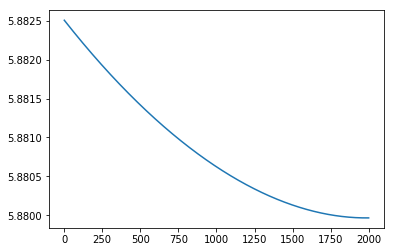

In [149]:
itera,alpha = 2000,0.001
layers_dims = [X_train.shape[0],5,4,2,Y_train.shape[0]]
p,costs = nn( X_train, Y_train, layers_dims,itera,alpha, print_cost= True)
# print(p)

import seaborn as sns
# print(costs)
sns.lineplot(x= np.arange(1,itera),y =costs)